Határozzuk meg az alábbi ábrán látható tartó súlypontvonalának eltolódását leíró $v\left(x\right)$ függvényt végeselemes módszer használatával, síkbeli egyenes gerendalemek alkalmazásával.
Vizsgáljuk meg a végeselemes megoldással kapott hajlítónyomatéki igénybevétel hibáját az egyes szakaszokon.
Határozzuk meg az $x = a/2$ keresztmetszetben a hajlítónyomatéki igénybevétel nagyságát 2, illetve 3 síkbeli egyenes gerendaelem alkalmazásával.
A tartók két különböző átmérőjű ($d_1 = 2d$, illetve $d_2 = d$) kör keresztmetszetű tartókból
vannak összeépítve.
A tartók anyaga lineárisan rugalmas, homogén, izotrop. A $d_1$ átmérőjű rész rugalmassági modulusza $E$, míg a $d_2$ átmérővel rendelkező részé $4E$.

In [1]:
import sympy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sp.init_printing()

In [2]:
p, xi, L, I, E = sp.symbols("p, xi L I E")

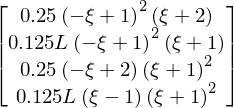

In [3]:
Nv = 1/8*sp.Matrix([2*(1-xi)**2*(2+xi),
                 L*(1-xi)**2*(1+xi),
                 2*(1+xi)**2*(2-xi),
                 L*(1+xi)**2*(xi-1)])
Nv

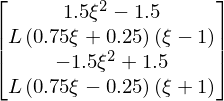

In [4]:
Nfi=sp.diff(Nv,xi)*(2/L)
sp.simplify((1/L)**(-1)*Nfi)

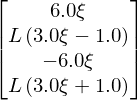

In [25]:
Bv=sp.diff(Nv,xi,2)*(2/L)**2
sp.simplify((1/L**2)**(-1)*Bv)

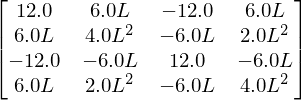

In [30]:
KeBEAM1D = I*E*sp.integrate(Bv*(Bv.T),(xi,-1,1))*L/2
(I*E/L**3)**(-1)*KeBEAM1D

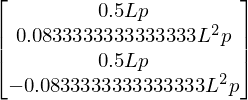

In [31]:
Fp = p*sp.integrate(Nv,(xi,-1,1))*L/2
Fp

In [32]:
def Bvfgv(xi,L):
    return np.multiply(1/L**2,np.array([6*xi, L*(3*xi-1),-6*xi,-L*(3*xi+1)]))

In [33]:
def Nvfgv(xi,L):
    return np.array([1/4*(1-xi)**2*(2+xi),
                 L/8*(1-xi)**2*(1+xi),
                 1/4*(1+xi)**2*(2-xi),
                 L/8*(1+xi)**2*(xi-1)])

In [34]:
def dddNvfgv(xi,L):
    return np.multiply(1/L**3,np.array([12, 6*L, -12, 6*L]))

In [35]:
def Nfifgv(xi,L):
    return np.multiply(1/L,np.array([1.5*xi**2-1.5,
                     L*(0.75*xi+0.25)*(xi-1),
                     -1.5*xi**2+1.5,
                     L*(0.75*xi-0.25)*(xi+1)]))

In [36]:
def KeBEAM1D(I,E,L):
    return np.multiply(I*E/L**3, np.array([[12,   6*L,    -12,  6*L],
                                           [6*L,  4*L**2, -6*L, 2*L**2],
                                           [-12,  -6*L,    12,  -6*L],
                                           [6*L, 2*L**2, -6*L, 4*L**2]]))

In [37]:
def Fp(p,L):
    return np.multiply(L*p,np.array([1/2,L/12,1/2,-L/12]))

In [38]:
a=800e-3
b=400e-3
d=20e-3
E=50e9
nu=0.3
F1=2500
M1=-500
p0=-5000

In [39]:
I1 = (2*d)**4*np.pi/64
I2 = (d)**4*np.pi/64
E1 = E
E2 = 4*E
Ke1 = KeBEAM1D(I1,E1,a)
Ke2 = KeBEAM1D(I2,E2,b)

In [40]:
elemSZF = np.array([[1,2,3,4],[3,4,5,6]]) - 1

In [41]:
KG=np.zeros((6,6))

In [42]:
eind=0
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke1

In [43]:
eind=1
KG[np.ix_(elemSZF[eind],elemSZF[eind])]+=Ke2

In [44]:
FG=np.zeros(6)
FG[elemSZF[0]] += Fp(p0,a)
FG[elemSZF[0,2]] += F1
FG[elemSZF[1,3]] += M1
FG

array([-2000.        ,  -266.66666667,   500.        ,   266.66666667,
           0.        ,  -500.        ])

In [45]:
fixSZF=np.array([1,2,5])-1

In [46]:
szabadSZF=[i for i in range(0,6) if i not in fixSZF]
szabadSZF

In [47]:
KGkond = KG[np.ix_(szabadSZF,szabadSZF)]

In [48]:
FGkond = FG[np.ix_(szabadSZF)]

In [49]:
Umego = np.linalg.solve(KGkond,FGkond)
Umego

array([ 0.01358122,  0.02122066, -0.0933709 ])

In [50]:
UG = np.zeros(6)
UG[np.ix_(szabadSZF)] += Umego
UG

array([ 0.        ,  0.        ,  0.01358122,  0.02122066,  0.        ,
       -0.0933709 ])

In [51]:
FR = np.dot(KG,UG)-FG
FR

array([  1.25000000e+03,  -2.00000000e+02,   0.00000000e+00,
         5.68434189e-14,   2.50000000e+02,  -1.13686838e-13])

# Eredmények ábrázolása

In [52]:
xiLista = np.linspace(-1,1,num = 20)
cspxKRD=[[0,a],[a,a+b]]
cspxKRD

In [53]:
x1Lista=[(cspxKRD[0][1]-cspxKRD[0][0])/2*(xi+1) + cspxKRD[0][0] for xi in xiLista]
x2Lista=[(cspxKRD[1][1]-cspxKRD[1][0])/2*(xi+1) + cspxKRD[1][0] for xi in xiLista]
xLista = np.concatenate((x1Lista,x2Lista))

In [54]:
v1Lista = [np.dot(Nvfgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
v2Lista = [np.dot(Nvfgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
vLista = np.concatenate((v1Lista,v2Lista))

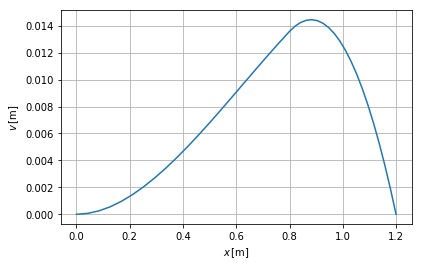

In [55]:
figv = plt.figure(num = 1, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()

In [56]:
fi1Lista = [np.dot(Nfifgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
fi2Lista = [np.dot(Nfifgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
fiLista = np.concatenate((fi1Lista,fi2Lista))

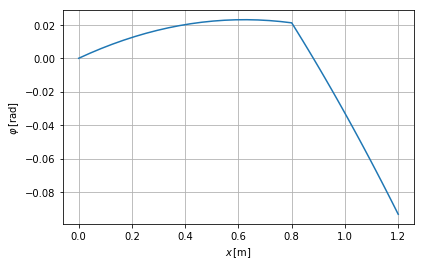

In [57]:
figfi = plt.figure(num = 2, figsize=(16/2.54,10/2.54))
axfi = figfi.add_subplot(111)

axfi.plot(xLista,fiLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$\varphi \, \left[\mathrm{rad}\right]$")

plt.grid()
plt.legend()
plt.show()

In [58]:
Mh1Lista = [-I1*E1*np.dot(Bvfgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
Mh2Lista = [-I2*E2*np.dot(Bvfgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
MhLista = np.concatenate((Mh1Lista,Mh2Lista))

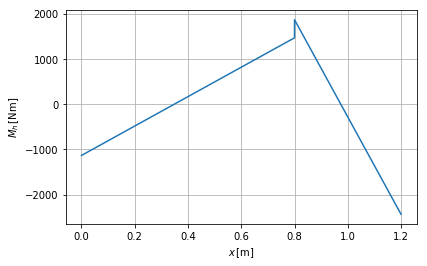

In [59]:
figMh = plt.figure(num = 3, figsize=(16/2.54,10/2.54))
axMh = figMh.add_subplot(111)

axMh.plot(xLista,MhLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$M_h \, \left[\mathrm{Nm}\right]$")

plt.grid()
plt.legend()
plt.show()

In [60]:
V1Lista = [I1*E1*np.dot(dddNvfgv(xi,a),UG[elemSZF[0]]) for xi in xiLista]
V2Lista = [I2*E2*np.dot(dddNvfgv(xi,b),UG[elemSZF[1]]) for xi in xiLista]
VLista = np.concatenate((V1Lista,V2Lista))

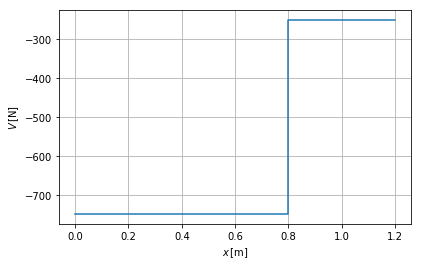

In [61]:
figV = plt.figure(num = 4, figsize=(16/2.54,10/2.54))
axV = figV.add_subplot(111)

axV.plot(xLista,VLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$V \, \left[\mathrm{N}\right]$")

plt.grid()
plt.legend()
plt.show()